# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices in the 2008 [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

Imports

In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime 
%matplotlib inline

## Data

There would be stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [7]:
df = pd.read_pickle('all_banks')
df

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [9]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

max Close price for each bank's stock throughout the time period

In [9]:
df.xs("Close",axis=1,level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [11]:
returns = pd.DataFrame()

Calculating returns

In [12]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

for bank in tickers:
    returns[bank+" Return"] = df[bank]["Close"].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


using pairplot to explore relations

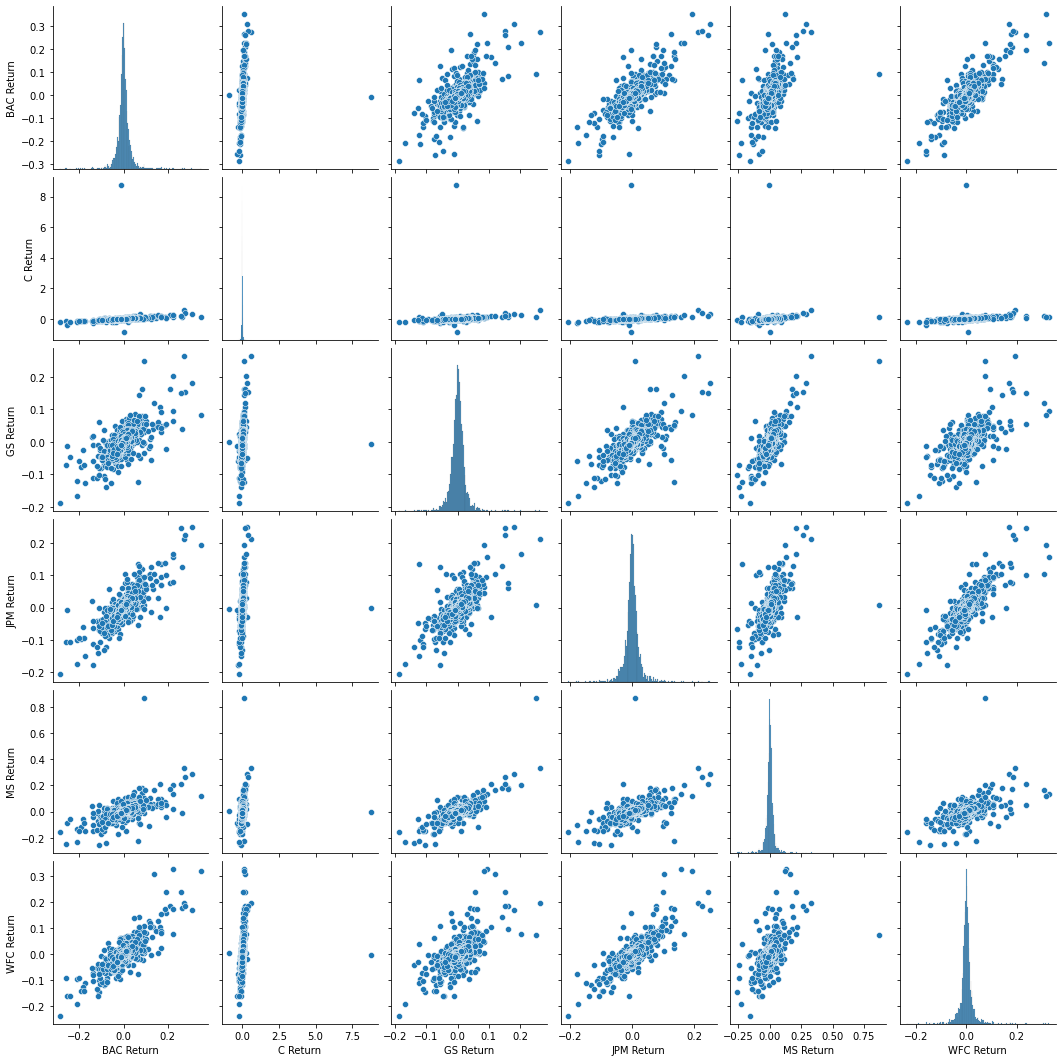

In [13]:

import seaborn as sns
sns.pairplot(returns)

Getting the best and worst day for each bank

In [26]:

returns.idxmax()
    

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [27]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [28]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

Exploring Morgan Stanley  and City groups

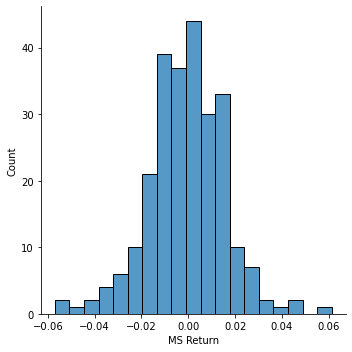

In [17]:
sns.displot(returns['2015-01-01':'2015-12-31']["MS Return"])

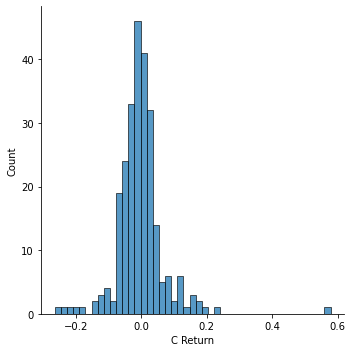

In [18]:
sns.displot(returns['2008-01-01':'2008-12-31']["C Return"])

____
# More Visualization


### Imports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Date'>

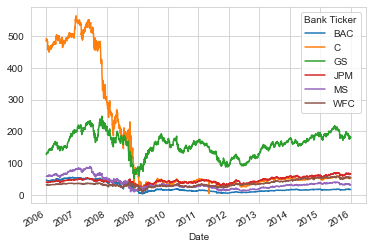

In [23]:
df2 = df.xs("Close",axis=1,level="Stock Info")
df2.plot()

## Moving Averages



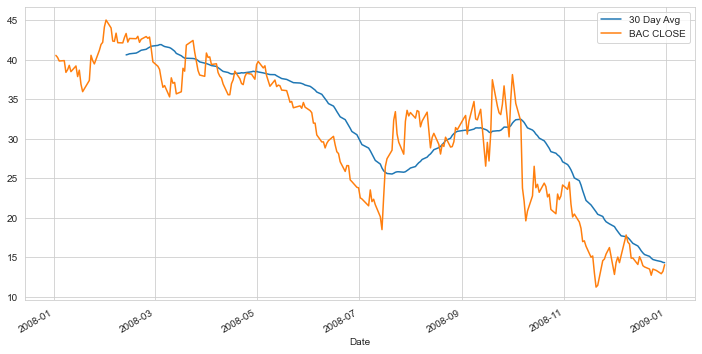

In [32]:
plt.figure(figsize=(12,6))
BAC = df2["BAC"]['2008-01-01':'2009-01-01']
BAC2 = df2["BAC"]['2008-01-01':'2009-01-01']
BAC.rolling(window=30).mean().plot(label='30 Day Avg')
BAC2.plot(label='BAC CLOSE')
plt.legend()

Exploring corelations

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

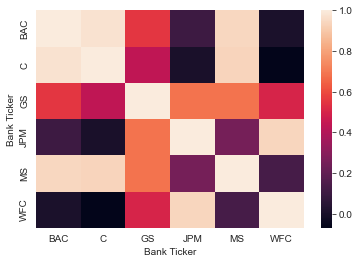

In [34]:
sns.heatmap(df2.corr())

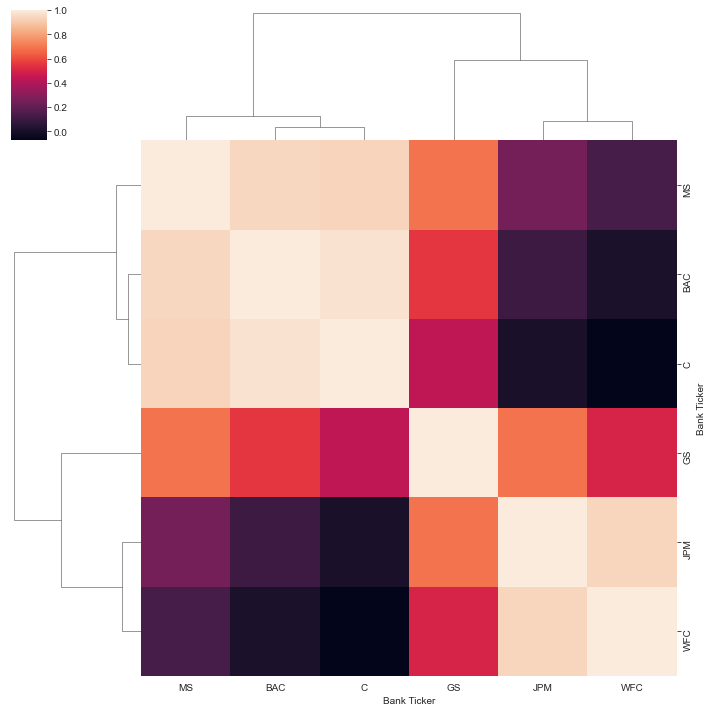

In [35]:
sns.clustermap(df2.corr())